In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
df = pd.read_csv('/content/IMDB Dataset.csv')

print(df.head())
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


/tmp/ipython-input-12-866097312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='husl')


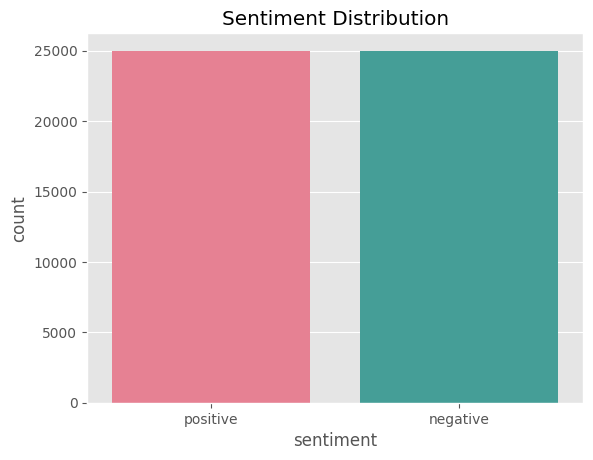

In [12]:
sns.countplot(x='sentiment', data=df, palette='husl')
plt.title("Sentiment Distribution")
plt.show()


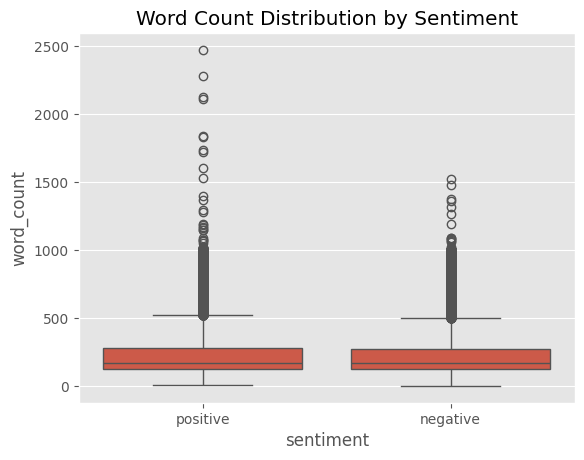

In [13]:
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

sns.boxplot(x='sentiment', y='word_count', data=df)
plt.title("Word Count Distribution by Sentiment")
plt.show()


In [14]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the raw dataset again
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [16]:
def advanced_preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [17]:
df['cleaned_review'] = df['review'].apply(clean_text)
df['processed_review'] = df['review'].apply(advanced_preprocess)

In [18]:
df = df.sample(5000, random_state=42)

In [19]:
df['original_length'] = df['review'].str.len()
df['processed_length'] = df['processed_review'].str.len()

print(f"Avg original length: {df['original_length'].mean():.0f} chars")
print(f"Avg processed length: {df['processed_length'].mean():.0f} chars")
print(f"Reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean()) * 100:.1f}%")

Avg original length: 1321 chars
Avg processed length: 823 chars
Reduction: 37.7%


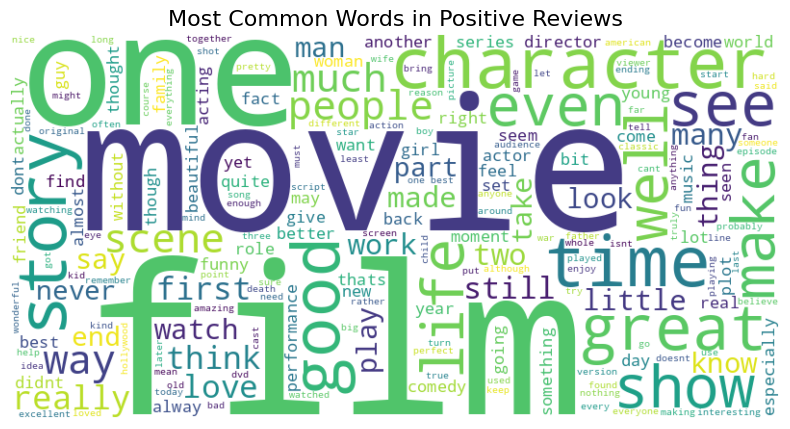

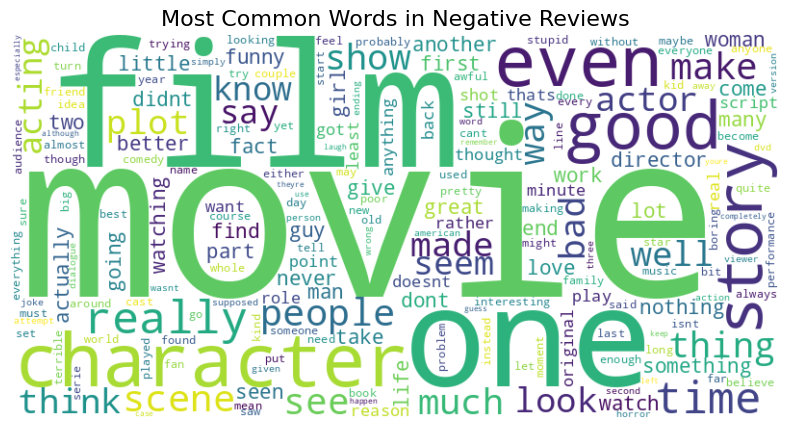

In [20]:
positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

create_wordcloud(positive_text, 'Most Common Words in Positive Reviews')
print("\n")
create_wordcloud(negative_text, 'Most Common Words in Negative Reviews')

In [21]:
df_processed = df[['processed_review', 'sentiment']].copy()
df_processed.to_csv('/content/processed_reviews.csv', index=False)
print("✅ Processed data saved!")

✅ Processed data saved!


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Load processed reviews
df = pd.read_csv('/content/processed_reviews.csv')
print(f"Loaded {len(df)} samples")
df.head()

Loaded 5000 samples


,processed_review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television show appeal quite many differe...,positive
2,film quickly get major chase scene ever increa...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectation somewhat high went see movie thoug...,negative


In [24]:
X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Transform text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2, max_df=0.95)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"🔧 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model

    # Cross-validation
    cv_score = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    test_accuracy = model.score(X_test_tfidf, y_test)

    results[name] = {
        'CV Mean': cv_score.mean(),
        'CV Std': cv_score.std(),
        'Test Accuracy': test_accuracy
    }

🔧 Training Logistic Regression...
🔧 Training Naive Bayes...
🔧 Training Random Forest...
🔧 Training SVM...


In [26]:
results_df = pd.DataFrame(results).T.sort_values(by='Test Accuracy', ascending=False)
results_df

,CV Mean,CV Std,Test Accuracy
Logistic Regression,0.84825,0.010296,0.853
SVM,0.84600,0.010167,0.851
Naive Bayes,0.84500,0.007624,0.849
Random Forest,0.82050,0.009830,0.839


In [27]:
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
print(f"✅ Best Model: {best_model_name}")

✅ Best Model: Logistic Regression


              precision    recall  f1-score   support

    negative       0.86      0.83      0.85       496
    positive       0.84      0.87      0.86       504

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



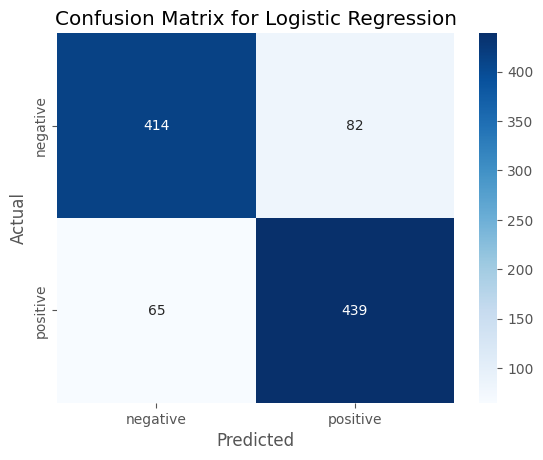

In [28]:
y_pred = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
joblib.dump(best_model, '/content/best_sentiment_model.pkl')
joblib.dump(vectorizer, '/content/tfidf_vectorizer.pkl')
print("💾 Model and vectorizer saved!")

💾 Model and vectorizer saved!


In [30]:
import joblib

# Load model and vectorizer
model = joblib.load('/content/best_sentiment_model.pkl')
vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')

In [31]:
import re, nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english') and len(t) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return ' '.join(tokens)

In [32]:
def predict_sentiment(text):
    if not text.strip():
        return "Please enter some text", 0.0

    processed = preprocess_text(text)
    vect_text = vectorizer.transform([processed])

    pred = model.predict(vect_text)[0]
    conf = model.predict_proba(vect_text).max()

    return pred, round(conf * 100, 2)

In [33]:
import ipywidgets as widgets
from IPython.display import display, clear_output

text_box = widgets.Textarea(
    placeholder='Type a review here...',
    layout=widgets.Layout(width='100%', height='100px')
)

button = widgets.Button(description="Analyze", button_style='success')
output = widgets.Output()

def on_click(b):
    with output:
        clear_output()
        prediction, confidence = predict_sentiment(text_box.value)
        print("🎯 Sentiment:", prediction.upper())
        print(f"📊 Confidence: {confidence}%")

button.on_click(on_click)
display(text_box, button, output)

Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Type a review here...')

Button(button_style='success', description='Analyze', style=ButtonStyle())

Output()

In [34]:
sample_reviews = [
    "This movie was absolutely amazing!",
    "What a waste of time.",
    "Decent performance, but the plot was weak.",
    "I loved every minute of it.",
    "Poor direction and boring characters."
]

for review in sample_reviews:
    prediction, confidence = predict_sentiment(review)
    print(f"{prediction.upper():>8} ({confidence}%) — {review}")

POSITIVE (73.13%) — This movie was absolutely amazing!
NEGATIVE (92.68%) — What a waste of time.
NEGATIVE (69.19%) — Decent performance, but the plot was weak.
POSITIVE (61.22%) — I loved every minute of it.
NEGATIVE (94.2%) — Poor direction and boring characters.
